<a href="https://colab.research.google.com/github/ChenghaoXu1718/SEP-788-789/blob/main/788AS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment description\
Use dataset from kaggle: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data \
Only use closed price column, use the 7 previous closed price to perdict 8th price\

1. Visualize data\
  only use closed price\
  draw plot close price vs date
2. Pre processing date\
  normalize\
  split
3. Design LSTM network
4. Evaluate model and predict
5. plot predict and actual




###Mount drive to read dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/AS4")#project file path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint



###Read data set

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AS4/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [ ]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

df = data[['Timestamp', 'Close']]

index = df.index
date = []
price = []
for i in index:
  p = df.iloc[i,1]
  t = df.iloc[i,0]
  if p > 0:
    price.append(p)
    date.append(t)


In [ ]:
new_df = pd.DataFrame(list(zip(date,price)),columns = ['Timestamp', 'Close price'])
new_df.head(10)

,Timestamp,Close price
0,1325317920,4.39
1,1325346600,4.39
2,1325350740,4.57
3,1325350800,4.58
4,1325391360,4.58
5,1325431680,4.84
6,1325457900,5.00
7,1325534640,5.00
8,1325591100,5.32
9,1325600520,5.14


###Visualize data

Text(0.5, 1.0, 'Close price vs date')

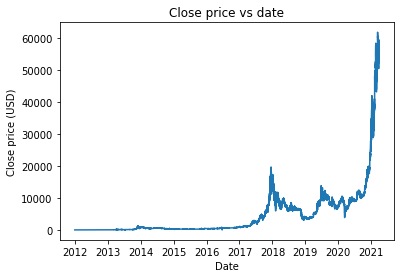

In [ ]:
#plot date vs price
days = pd.to_datetime(new_df['Timestamp'], unit='s')

plt.plot(days, new_df['Close price'])
plt.ylabel('Close price (USD)')
plt.xlabel('Date')
plt.title('Close price vs date')

### Process data

In [ ]:
scaler = StandardScaler()
df_sca = np.array(new_df.iloc[:,1])
df_sca = df_sca[..., np.newaxis]
#normalize data
df_sca = scaler.fit_transform(df_sca)


In [ ]:
past = 7
future = 1
x_train = []
y_train = []

for i in range(past, len(df_sca)-future +1):
  x_train.append(df_sca[i-past:i])
  y_train.append(df_sca[i+future-1:i+future])

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
#split data
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1)

###Build model with LSTM

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#load saved best weight firstly
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/AS4/model.h5" #save model to drive path
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss',
                             verbose=1,save_best_only=True, mode = 'min')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=1600, validation_data=(x_test,y_test), verbose=1, callbacks = callbacks_list)

Epoch 1/5
2033/2033 [==============================] - ETA: 0s - loss: 0.0337
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/AS4/model.h5
2033/2033 [==============================] - 72s 33ms/step - loss: 0.0337 - val_loss: 1.1519e-04
Epoch 2/5
2033/2033 [==============================] - ETA: 0s - loss: 0.0235
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/AS4/model.h5
2033/2033 [==============================] - 67s 33ms/step - loss: 0.0235 - val_loss: 0.0018
Epoch 3/5
2033/2033 [==============================] - ETA: 0s - loss: 0.0234
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/AS4/model.h5
2033/2033 [==============================] - 67s 33ms/step - loss: 0.0234 - val_loss: 1.2831e-04
Epoch 4/5
2033/2033 [==============================] - ETA: 0s - loss: 0.0235
Epoch 4: saving model to /content/drive/MyDrive/Colab Notebooks/AS4/model.h5

Epoch 4: saving model to /content/drive/MyDrive/Colab Notebooks/AS4/model.h5
2033/2033 [====

###Evaluation

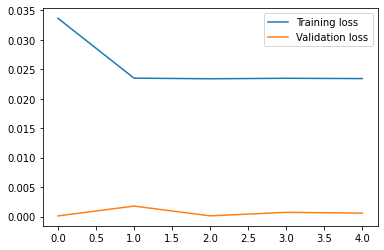

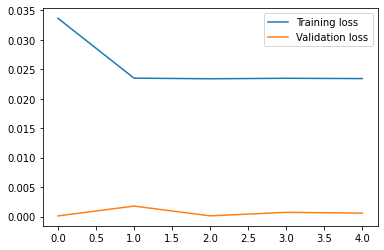

In [ ]:

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

### Predict and plot

In [ ]:
#predict
#model.load_weights(checkpoint_path)
prediction = model.predict(x_test[0:75])
y_pred_future = scaler.inverse_transform(prediction)
y_test_future = scaler.inverse_transform(np.squeeze(y_test[0:75], axis=2))

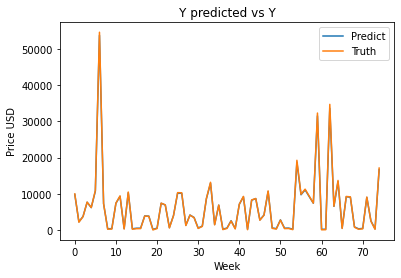

In [ ]:
plt.figure
plt.plot(y_pred_future, label = 'Predict')
plt.plot(y_test_future, label = 'Truth')
plt.title('Y predicted vs Y')
plt.xlabel('Week')
plt.ylabel('Price USD')
plt.legend()